##Apyori algorithm on NYC_taxi fare dataset

Association rule mining algotithm to find simple underlying relations between different carachteristics of a taxi ride.

In [ ]:
 import pandas as pd                              # import of previously cleaned dataset prepared at the end of classification notebook
data = pd.read_csv('/content/nyc_apr.csv')

In [ ]:
!pip install apyori

In [ ]:
import matplotlib.pyplot as plt
from apyori import apriori

In [ ]:
data.head()

,passenger_count,wd,month,year,hour,pickup_orientation,dropoff_orientation,D_class,fare_class,jfk,lga,ewr,tsq,cpk,lib,gct,met,wtc
0,1,0,5,2009,17,SW_pickup,SW_dropoff,near dist,low fare,2,2,2,2,2,2,2,2,2
1,2,3,7,2011,0,C_pickup,C_dropoff,near dist,low fare,2,2,2,2,2,2,2,2,2
2,1,5,3,2012,4,C_pickup,C_dropoff,near dist,medium fare,2,2,2,2,2,2,2,2,2
3,1,1,2,2010,7,C_pickup,NW_dropoff,near dist,low fare,2,2,2,2,2,2,2,2,2
4,1,3,0,2011,9,C_pickup,C_dropoff,medium dist,medium fare,2,2,2,2,2,2,2,2,2


For this algorithm it's convenient to print the output as nominal values to meake the interpretation easier

In [ ]:
data.loc[(data['wd'] == 0), 'weekday'] = 'Monday'         
data.loc[(data['wd'] == 1), 'weekday'] = 'Tuesday'
data.loc[(data['wd'] == 2), 'weekday'] = 'Wednesday'
data.loc[(data['wd'] == 3), 'weekday'] = 'Thursday'
data.loc[(data['wd'] == 4), 'weekday'] = 'Friday'
data.loc[(data['wd'] == 5), 'weekday'] = 'Saturday'
data.loc[(data['wd'] == 6), 'weekday'] = 'Sunday'


In [ ]:
data.loc[(data['month'] == 0), 'Month'] = 'January'
data.loc[(data['month'] == 1), 'Month'] = 'February'
data.loc[(data['month'] == 2), 'Month'] = 'March'
data.loc[(data['month'] == 3), 'Month'] = 'April'
data.loc[(data['month'] == 4), 'Month'] = 'May'
data.loc[(data['month'] == 5), 'Month'] = 'June'
data.loc[(data['month'] == 6), 'Month'] = 'July'
data.loc[(data['month'] == 7), 'Month'] = 'August'
data.loc[(data['month'] == 8), 'Month'] = 'September'
data.loc[(data['month'] == 9), 'Month'] = 'October'
data.loc[(data['month'] == 10), 'Month'] = 'November'
data.loc[(data['month'] == 11), 'Month'] = 'December'

In [ ]:
data.loc[(data['hour'] == 0), 'Time'] = '24 pm'
data.loc[(data['hour'] == 1), 'Time'] = '1 am'
data.loc[(data['hour'] == 2), 'Time'] = '2 am'
data.loc[(data['hour'] == 3), 'Time'] = '3 am'
data.loc[(data['hour'] == 4), 'Time'] = '4 am'
data.loc[(data['hour'] == 5), 'Time'] = '5 am'
data.loc[(data['hour'] == 6), 'Time'] = '6 am'
data.loc[(data['hour'] == 7), 'Time'] = '7 am'
data.loc[(data['hour'] == 8), 'Time'] = '8 am'
data.loc[(data['hour'] == 9), 'Time'] = '9 am'
data.loc[(data['hour'] == 10), 'Time'] = '10 am'
data.loc[(data['hour'] == 11), 'Time'] = '11 am'
data.loc[(data['hour'] == 12), 'Time'] = '12 am'
data.loc[(data['hour'] == 13), 'Time'] = '1 pm'
data.loc[(data['hour'] == 14), 'Time'] = '2 pm'
data.loc[(data['hour'] == 15), 'Time'] = '3 pm'
data.loc[(data['hour'] == 16), 'Time'] = '4 pm'
data.loc[(data['hour'] == 17), 'Time'] = '5 pm'
data.loc[(data['hour'] == 18), 'Time'] = '6 pm'
data.loc[(data['hour'] == 19), 'Time'] = '7 pm'
data.loc[(data['hour'] == 20), 'Time'] = '8 pm'
data.loc[(data['hour'] == 21), 'Time'] = '9 pm'
data.loc[(data['hour'] == 22), 'Time'] = '10 pm'
data.loc[(data['hour'] == 23), 'Time'] = '11 pm'



In [ ]:
data.describe()

,passenger_count,wd,month,year,hour,jfk,lga,ewr,tsq,cpk,lib,gct,met,wtc
count,909157.000000,909157.000000,909157.000000,909157.000000,909157.000000,909157.000000,909157.000000,909157.000000,909157.000000,909157.000000,909157.000000,909157.000000,909157.000000,909157.000000
mean,1.688241,3.039539,5.253983,2011.717349,13.574978,1.995700,1.999836,1.999634,1.999875,1.999868,1.999857,1.999878,1.999870,1.999878
std,1.304325,1.945607,3.442174,1.864384,6.481661,0.065966,0.014109,0.019813,0.012320,0.012585,0.013014,0.012185,0.012497,0.012185
min,1.000000,0.000000,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,2010.000000,9.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,3.000000,5.000000,2012.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,5.000000,8.000000,2013.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,6.000000,6.000000,11.000000,2015.000000,23.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
data.loc[(data['jfk'] == 0), 'from_drop_jfk'] = 'jfk_near'
data.loc[(data['jfk'] == 1), 'from_drop_jfk'] = 'jfk_med'
data.loc[(data['jfk'] == 2), 'from_drop_jfk'] = 'jfk_far'

data.loc[(data['lga'] == 0), 'from_drop_lga'] = 'lga_near'
data.loc[(data['lga'] == 1), 'from_drop_lga'] = 'lga_med'
data.loc[(data['lga'] == 2), 'from_drop_lga'] = 'lga_far'

data.loc[(data['ewr'] == 0), 'from_drop_lga'] = 'ewr_near'
data.loc[(data['ewr'] == 1), 'from_drop_lga'] = 'ewr_med'
data.loc[(data['ewr'] == 2), 'from_drop_lga'] = 'ewr_far'

data.loc[(data['tsq'] == 0), 'from_drop_tsq'] = 'tsq_near'
data.loc[(data['tsq'] == 1), 'from_drop_tsq'] = 'tsq_med'
data.loc[(data['tsq'] == 2), 'from_drop_tsq'] = 'tsq_far'

data.loc[(data['cpk'] == 0), 'from_drop_cpk'] = 'cpk_near'
data.loc[(data['cpk'] == 1), 'from_drop_cpk'] = 'cpk_med'
data.loc[(data['cpk'] == 2), 'from_drop_cpk'] = 'cpk_far'

data.loc[(data['lib'] == 0), 'from_drop_lib'] = 'lib_near'
data.loc[(data['lib'] == 1), 'from_drop_lib'] = 'lib_med'
data.loc[(data['lib'] == 2), 'from_drop_lib'] = 'lib_far'

data.loc[(data['gct'] == 0), 'from_drop_gct'] = 'gct_near'
data.loc[(data['gct'] == 1), 'from_drop_gct'] = 'gct_med'
data.loc[(data['gct'] == 2), 'from_drop_gct'] = 'gct_far'

data.loc[(data['met'] == 0), 'from_drop_met'] = 'met_near'
data.loc[(data['met'] == 1), 'from_drop_met'] = 'met_med'
data.loc[(data['met'] == 2), 'from_drop_met'] = 'met_far'

data.loc[(data['wtc'] == 0), 'from_drop_wtc'] = 'wtc_near'
data.loc[(data['wtc'] == 1), 'from_drop_wtc'] = 'wtc_med'
data.loc[(data['wtc'] == 2), 'from_drop_wtc'] = 'wtc_far'

In [ ]:
data = data.drop(columns=['wd', 'month', 'hour', 'jfk',	'lga',	'ewr',	'tsq',	'cpk',	'lib',	'gct',	'met',	'wtc'])
data.head()

,passenger_count,year,pickup_orientation,dropoff_orientation,D_class,fare_class,weekday,Month,Time,from_drop_jfk,from_drop_lga,from_drop_tsq,from_drop_cpk,from_drop_lib,from_drop_gct,from_drop_met,from_drop_wtc
0,1,2009,SW_pickup,SW_dropoff,near dist,low fare,Monday,June,5 pm,jfk_far,ewr_far,tsq_far,cpk_far,lib_far,gct_far,met_far,wtc_far
1,2,2011,C_pickup,C_dropoff,near dist,low fare,Thursday,August,24 pm,jfk_far,ewr_far,tsq_far,cpk_far,lib_far,gct_far,met_far,wtc_far
2,1,2012,C_pickup,C_dropoff,near dist,medium fare,Saturday,April,4 am,jfk_far,ewr_far,tsq_far,cpk_far,lib_far,gct_far,met_far,wtc_far
3,1,2010,C_pickup,NW_dropoff,near dist,low fare,Tuesday,March,7 am,jfk_far,ewr_far,tsq_far,cpk_far,lib_far,gct_far,met_far,wtc_far
4,1,2011,C_pickup,C_dropoff,medium dist,medium fare,Thursday,January,9 am,jfk_far,ewr_far,tsq_far,cpk_far,lib_far,gct_far,met_far,wtc_far


In [ ]:
m,n = data.shape

In [ ]:
records = []
for i in range(0, 10):
    records.append([str(data.values[i,j]) for j in range(2, 10)])

In [ ]:
#rules = apriori(transactions, min_support=0.012, min_confidence=0.2, min_lift=1, min_length=2)  # min support: 10000/909157
rules = apriori(transactions)

In [ ]:
results = list(rules)
results

In [ ]:
data_results = pd.DataFrame(results)

In [ ]:
#all four empty list which will contain lhs, rhs, confidance and lift respectively.

first_values = []
second_values = []
third_values = []
fourth_value = []

# loop number of rows time and append 1 by 1 value in a separate list.. first and second element was frozenset which need to be converted in list..
for i in range(data_results.shape[0]):
    single_list = data_results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_value.append(single_list[3])

In [ ]:
#convert all four list into dataframe for further operation..
lhs = pd.DataFrame(first_values)
rhs= pd.DataFrame(second_values)
confidance=pd.DataFrame(third_values,columns=['Confidance'])
lift=pd.DataFrame(fourth_value,columns=['lift'])

In [ ]:
#concat all list together in a single dataframe
data_final = pd.concat([lhs,rhs,support,confidance,lift], axis=1)
data_final

In [ ]:
#set column name
data_final.columns = ['lhs',1,2,3,'rhs','support','confidance','lift']


In [ ]:
#add all three column because those where the lhs itemset only
data_final['lhs'] = data_final['lhs']+str(", ")+data_final[1]+str(", ")+data_final[2]

In [ ]:
#drop those 1,2 column because now we already appended to lhs column..
data_final.drop(columns=[1,2,3],inplace=True)

In [ ]:
#this is final output.. you can sort based on the support lift and confidance..
data_final.head()

In [ ]:
data_final.sort_values(by=['support'])  # resulted rules sorted by ascending support

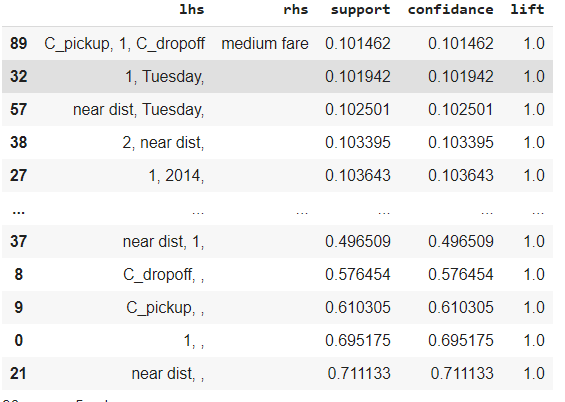

In [ ]:
data_final.sort_values(by=['lift'])# resulted rules sorted by ascending lift

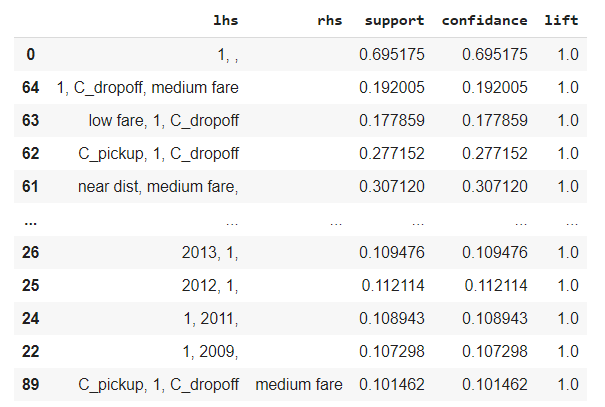

In [ ]:
for item in rules:                            # Print support, confidence and lift for most significant rules (with higher values)

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")